<a href="https://colab.research.google.com/github/John260260/Classification_problms_ML/blob/main/heart_disease_clsfy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV,train_test_split
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/heart.csv')

In [ ]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


sex :(1 = male; 0 = female)

cp: chest pain type

trestbps: resting blood pressure (in mm Hg on admission to the hospital)

chol: serum cholestoral in mg/dl

fbs: (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)

restecg: resting electrocardiographic results

thalach: maximum heart rate achieved

exang: exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment

ca: number of major vessels (0-3) colored by flourosopy

thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
Counter(df['target'])

Counter({0: 138, 1: 165})

In [ ]:
138/(138+165)  #balanced distribution

0.45544554455445546

In [ ]:
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [ ]:
df.shape

(303, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
Counter (df['thal'])

Counter({0: 2, 1: 18, 2: 166, 3: 117})

In [ ]:
Counter (df['cp'])

Counter({0: 143, 1: 50, 2: 87, 3: 23})

In [ ]:
Counter (df['sex'])

Counter({0: 96, 1: 207})

In [ ]:
Counter (df['trestbps'])

Counter({94: 2,
         100: 4,
         101: 1,
         102: 2,
         104: 1,
         105: 3,
         106: 1,
         108: 6,
         110: 19,
         112: 9,
         114: 1,
         115: 3,
         117: 1,
         118: 7,
         120: 37,
         122: 4,
         123: 1,
         124: 6,
         125: 11,
         126: 3,
         128: 12,
         129: 1,
         130: 36,
         132: 8,
         134: 5,
         135: 6,
         136: 3,
         138: 13,
         140: 32,
         142: 3,
         144: 2,
         145: 5,
         146: 2,
         148: 2,
         150: 17,
         152: 5,
         154: 1,
         155: 1,
         156: 1,
         160: 11,
         164: 1,
         165: 1,
         170: 4,
         172: 1,
         174: 1,
         178: 2,
         180: 3,
         192: 1,
         200: 1})

In [ ]:
Counter (df['chol'])

Counter({126: 1,
         131: 1,
         141: 1,
         149: 2,
         157: 1,
         160: 1,
         164: 1,
         166: 1,
         167: 1,
         168: 1,
         169: 1,
         172: 1,
         174: 1,
         175: 3,
         176: 1,
         177: 4,
         178: 1,
         180: 1,
         182: 1,
         183: 1,
         184: 1,
         185: 1,
         186: 1,
         187: 1,
         188: 2,
         192: 2,
         193: 2,
         195: 1,
         196: 2,
         197: 6,
         198: 2,
         199: 3,
         200: 1,
         201: 3,
         203: 3,
         204: 6,
         205: 2,
         206: 2,
         207: 2,
         208: 2,
         209: 2,
         210: 1,
         211: 4,
         212: 5,
         213: 2,
         214: 2,
         215: 1,
         216: 2,
         217: 1,
         218: 2,
         219: 3,
         220: 3,
         221: 2,
         222: 2,
         223: 3,
         224: 1,
         225: 2,
         226: 4,
         227: 

In [ ]:
Counter (df['fbs'])

Counter({0: 258, 1: 45})

In [ ]:
Counter (df['restecg'])

Counter({0: 147, 1: 152, 2: 4})

In [ ]:
Counter (df['thalach'])

Counter({71: 1,
         88: 1,
         90: 1,
         95: 1,
         96: 2,
         97: 1,
         99: 1,
         103: 2,
         105: 3,
         106: 1,
         108: 2,
         109: 2,
         111: 3,
         112: 2,
         113: 1,
         114: 3,
         115: 3,
         116: 2,
         117: 1,
         118: 1,
         120: 3,
         121: 1,
         122: 4,
         123: 2,
         124: 1,
         125: 7,
         126: 4,
         127: 1,
         128: 1,
         129: 1,
         130: 4,
         131: 4,
         132: 7,
         133: 2,
         134: 1,
         136: 2,
         137: 1,
         138: 3,
         139: 2,
         140: 6,
         141: 3,
         142: 6,
         143: 7,
         144: 7,
         145: 4,
         146: 4,
         147: 5,
         148: 3,
         149: 2,
         150: 7,
         151: 4,
         152: 8,
         153: 3,
         154: 5,
         155: 4,
         156: 6,
         157: 5,
         158: 6,
         159: 4,
    

In [ ]:
Counter (df['oldpeak'])

Counter({0.0: 99,
         0.1: 7,
         0.2: 12,
         0.3: 3,
         0.4: 9,
         0.5: 5,
         0.6: 14,
         0.7: 1,
         0.8: 13,
         0.9: 3,
         1.0: 14,
         1.1: 2,
         1.2: 17,
         1.3: 1,
         1.4: 13,
         1.5: 5,
         1.6: 11,
         1.8: 10,
         1.9: 5,
         2.0: 9,
         2.1: 1,
         2.2: 4,
         2.3: 2,
         2.4: 3,
         2.5: 2,
         2.6: 6,
         2.8: 6,
         2.9: 1,
         3.0: 5,
         3.1: 1,
         3.2: 2,
         3.4: 3,
         3.5: 1,
         3.6: 4,
         3.8: 1,
         4.0: 3,
         4.2: 2,
         4.4: 1,
         5.6: 1,
         6.2: 1})

In [ ]:
Counter (df['slope'])

Counter({0: 21, 1: 140, 2: 142})

In [ ]:
Counter (df['ca'])

Counter({0: 175, 1: 65, 2: 38, 3: 20, 4: 5})

In [ ]:
Counter (df['thal'])

Counter({0: 2, 1: 18, 2: 166, 3: 117})

##EDA

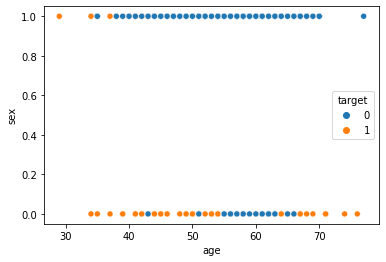

In [ ]:
plt.figure()
sns.scatterplot(x='age',y='sex',data = df,hue='target')
plt.show()

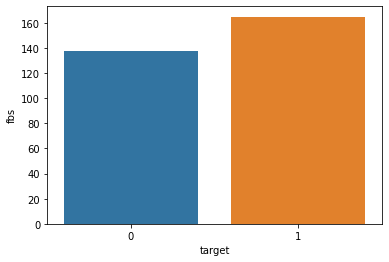

In [ ]:
df_dist = df[['target','fbs']].groupby('target').count().reset_index(drop=False)
plt.figure()
sns.barplot(x='target',y='fbs',data = df_dist)
plt.show()

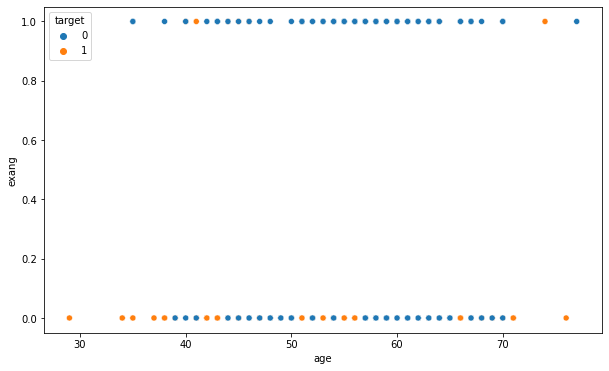

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='age',y='exang',data = df, hue='target')
plt.show()

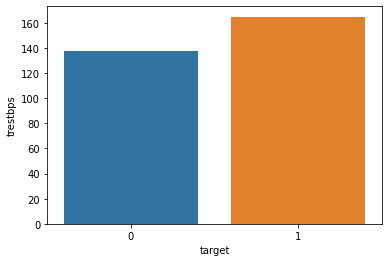

In [ ]:
df_distribution = df[['target','trestbps']].groupby('target').count().reset_index(drop=False)
plt.figure()
sns.barplot(x='target',y='trestbps',data = df_distribution)
plt.show()

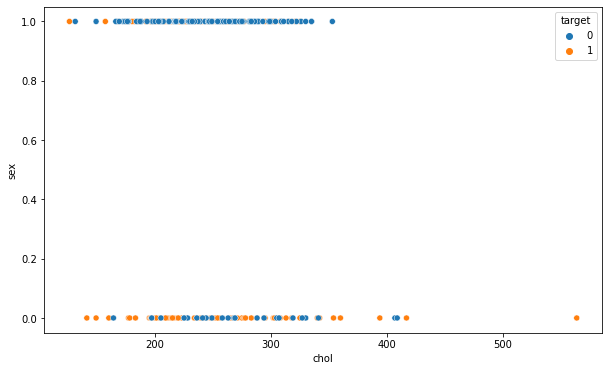

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='chol',y='sex',data = df, hue='target')
plt.show()

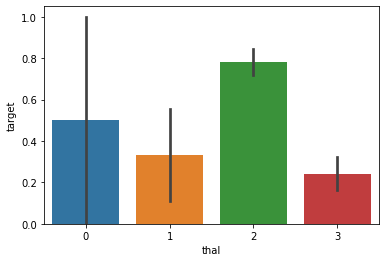

In [ ]:
plt.figure()
sns.barplot(x='thal',y='target',data=df)
plt.show()

In [ ]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

##DataModelling

In [ ]:
x=df.drop('target', axis=1)
y=df['target']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=123)

In [ ]:
#df.var()

Logistic Regression

In [ ]:
heart_df=LogisticRegression(penalty='l2',C=10, class_weight=None)
heart_df.fit(x_train,y_train)
y_train_predict=heart_df.predict(x_train)
y_test_predict=heart_df.predict(x_test)
print('Train Data')
print(metrics.classification_report(y_train,y_train_predict))
print('Test Data')
print(metrics.classification_report(y_test,y_test_predict))

Train Data
              precision    recall  f1-score   support

           0       0.94      0.81      0.87       108
           1       0.86      0.96      0.91       134

    accuracy                           0.89       242
   macro avg       0.90      0.89      0.89       242
weighted avg       0.90      0.89      0.89       242

Test Data
              precision    recall  f1-score   support

           0       0.77      0.80      0.79        30
           1       0.80      0.77      0.79        31

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
y_train_proba=heart_df.predict_proba(x_train)
y_test_proba=heart_df.predict_proba(x_test)

In [ ]:
Counter (y_train)

Counter({0: 108, 1: 134})

In [ ]:
Counter (y_test)

Counter({0: 30, 1: 31})

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_train,y_train_predict)


array([[ 88,  20],
       [  6, 128]])

In [ ]:
confusion_matrix(y_test,y_test_predict)

array([[24,  6],
       [ 7, 24]])

In [ ]:
def proba_class(y_proba,threshold):
  predicted_class=[0 if a[0]>threshold else 1 for a in y_proba]
  return np.array(predicted_class)

In [ ]:
from sklearn.metrics import precision_score,recall_score,fbeta_score
from sklearn.metrics import precision_recall_curve

In [ ]:
def classification_metrics(y_actual,y_pred):
  precision= precision_score(y_actual,y_pred)
  recall=recall_score(y_actual,y_pred)
  fb=fbeta_score(y_actual,y_pred, beta=1)
  print("precision:{}, recall:{}, f1_score:{}".format(round(precision,2),round(recall,2),round(fb,2)))
  return (precision,recall,fb)

In [ ]:
for threshold in range (10,100,10):
  trsh=threshold/100
  y_pred_train=proba_class(y_train_proba,trsh)
  print('Threshold:{}'.format(trsh))
  classification_metrics(y_train, y_pred_train) 

Threshold:0.1
precision:0.94, recall:0.49, f1_score:0.64
Threshold:0.2
precision:0.93, recall:0.65, f1_score:0.76
Threshold:0.3
precision:0.91, recall:0.79, f1_score:0.84
Threshold:0.4
precision:0.87, recall:0.88, f1_score:0.88
Threshold:0.5
precision:0.86, recall:0.96, f1_score:0.91
Threshold:0.6
precision:0.84, recall:0.96, f1_score:0.9
Threshold:0.7
precision:0.81, recall:0.97, f1_score:0.88
Threshold:0.8
precision:0.77, recall:0.97, f1_score:0.86
Threshold:0.9
precision:0.73, recall:0.97, f1_score:0.83


In [ ]:
thresholds_curve=[]
prec=[]
recall=[]
fb=[]
for threshold in range (10,100,10):
  trsh=threshold/100
  y_pred_train=proba_class(y_train_proba,trsh)
  print('Threshold:{}'.format(trsh))
  p,r,f=classification_metrics(y_train, y_pred_train)
  thresholds_curve.append(trsh)
  prec.append(p)
  recall.append(r)
  fb.append(f)

Threshold:0.1
precision:0.94, recall:0.49, f1_score:0.64
Threshold:0.2
precision:0.93, recall:0.65, f1_score:0.76
Threshold:0.3
precision:0.91, recall:0.79, f1_score:0.84
Threshold:0.4
precision:0.87, recall:0.88, f1_score:0.88
Threshold:0.5
precision:0.86, recall:0.96, f1_score:0.91
Threshold:0.6
precision:0.84, recall:0.96, f1_score:0.9
Threshold:0.7
precision:0.81, recall:0.97, f1_score:0.88
Threshold:0.8
precision:0.77, recall:0.97, f1_score:0.86
Threshold:0.9
precision:0.73, recall:0.97, f1_score:0.83


In [ ]:
for threshold in range (10,100,10):
  trsh=threshold/100
  y_pred_test=proba_class(y_test_proba,trsh)
  print('Threshold:{}'.format(trsh))
  classification_metrics(y_test, y_pred_test) 

Threshold:0.1
precision:1.0, recall:0.35, f1_score:0.52
Threshold:0.2
precision:0.9, recall:0.58, f1_score:0.71
Threshold:0.3
precision:0.84, recall:0.68, f1_score:0.75
Threshold:0.4
precision:0.79, recall:0.71, f1_score:0.75
Threshold:0.5
precision:0.8, recall:0.77, f1_score:0.79
Threshold:0.6
precision:0.74, recall:0.84, f1_score:0.79
Threshold:0.7
precision:0.72, recall:0.84, f1_score:0.78
Threshold:0.8
precision:0.71, recall:0.87, f1_score:0.78
Threshold:0.9
precision:0.66, recall:0.94, f1_score:0.77


In [ ]:
thresholds_curve_test=[]
prec_test=[]
recall_test=[]
fb_test=[]
for threshold in range (10,100,10):
  trsh=threshold/100
  y_pred_test=proba_class(y_test_proba,trsh)
  print('Threshold:{}'.format(trsh))
  p,r,f=classification_metrics(y_test, y_pred_test)
  thresholds_curve_test.append(trsh)
  prec_test.append(p)
  recall_test.append(r)
  fb_test.append(f)

Threshold:0.1
precision:1.0, recall:0.35, f1_score:0.52
Threshold:0.2
precision:0.9, recall:0.58, f1_score:0.71
Threshold:0.3
precision:0.84, recall:0.68, f1_score:0.75
Threshold:0.4
precision:0.79, recall:0.71, f1_score:0.75
Threshold:0.5
precision:0.8, recall:0.77, f1_score:0.79
Threshold:0.6
precision:0.74, recall:0.84, f1_score:0.79
Threshold:0.7
precision:0.72, recall:0.84, f1_score:0.78
Threshold:0.8
precision:0.71, recall:0.87, f1_score:0.78
Threshold:0.9
precision:0.66, recall:0.94, f1_score:0.77


Based on our training precision curve .40 is optimum threshold level while testing data shows around .55

In [ ]:
y_pred_train= proba_class(y_train_proba,0.40)
confusion_matrix(y_train,y_pred_train)

array([[ 91,  17],
       [ 16, 118]])

In [ ]:
#y_pred_train= proba_class(y_train_proba,0.55)
#confusion_matrix(y_train,y_pred_train)

array([[ 85,  23],
       [  5, 129]])

In [ ]:
y_pred_test= proba_class(y_test_proba,0.40)
confusion_matrix(y_test,y_pred_test)

array([[24,  6],
       [ 9, 22]])

In [ ]:
#y_pred_test= proba_class(y_test_proba,0.55)
#confusion_matrix(y_test,y_pred_test)

array([[23,  7],
       [ 7, 24]])

In [ ]:
print('Train Data')
print(metrics.classification_report(y_train,y_pred_train))
print('Test Data')
print(metrics.classification_report(y_test,y_pred_test))

Train Data
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       108
           1       0.87      0.88      0.88       134

    accuracy                           0.86       242
   macro avg       0.86      0.86      0.86       242
weighted avg       0.86      0.86      0.86       242

Test Data
              precision    recall  f1-score   support

           0       0.73      0.80      0.76        30
           1       0.79      0.71      0.75        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



In [ ]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_train, [a[1] for a in y_train_proba])

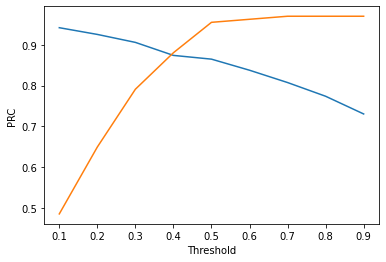

In [ ]:
sns.lineplot(x= thresholds_curve, y= prec)
sns.lineplot(x= thresholds_curve, y= recall)
plt.xlabel('Threshold')
plt.ylabel('PRC')
plt.show()

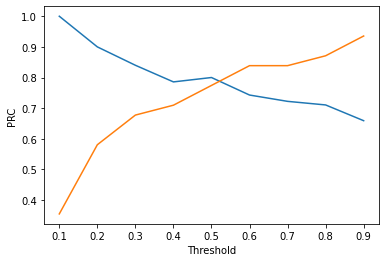

In [ ]:
sns.lineplot(x= thresholds_curve_test, y= prec_test)
sns.lineplot(x= thresholds_curve_test, y= recall_test)
plt.xlabel('Threshold')
plt.ylabel('PRC')
plt.show()

Decision tree classifier

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_train_predict = clf.predict(x_train)
y_test_predict = clf.predict(x_test)
print(metrics.classification_report(y_train,y_train_predict))
print(metrics.classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00       134

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242

              precision    recall  f1-score   support

           0       0.77      0.77      0.77        30
           1       0.77      0.77      0.77        31

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



In [ ]:
param_grids = {
    'max_depth':np.arange(2,10),
    'class_weight':[None,'balanced'],
    'ccp_alpha':[0.1,0.01,0.001,0.0001,1,2,5,10],
    'criterion':['gini','entropy']
}

clf = GridSearchCV(DecisionTreeClassifier(),param_grid=param_grids, cv= 5,scoring='f1_macro',n_jobs = -1)
clf.fit(x_train,y_train)
y_train_predict = clf.best_estimator_.predict(x_train)
y_test_predict = clf.best_estimator_.predict(x_test)
print(metrics.classification_report(y_train,y_train_predict))
print(metrics.classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.96      0.80      0.87       108
           1       0.86      0.97      0.91       134

    accuracy                           0.89       242
   macro avg       0.91      0.88      0.89       242
weighted avg       0.90      0.89      0.89       242

              precision    recall  f1-score   support

           0       0.73      0.63      0.68        30
           1       0.69      0.77      0.73        31

    accuracy                           0.70        61
   macro avg       0.71      0.70      0.70        61
weighted avg       0.71      0.70      0.70        61



In [ ]:
clf.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.01, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Random Forest

In [ ]:
params= {'n_estimators': [50,100,110],
         'max_depth': [15,25],
         'class_weight': [None,'balanced'],
         'ccp_alpha':[0.1,0.01,0.001,0.0001,1,2,5,10],
         'criterion':['gini','entropy']}

grid_model= GridSearchCV(RandomForestClassifier(),param_grid =params,scoring='f1_macro',cv=5,verbose=1,n_jobs=-1)
grid_model.fit(x_train,y_train)
y_train_predict =grid_model.best_estimator_.predict(x_train)
y_test_predict = grid_model.best_estimator_.predict(x_test)
print(metrics.classification_report(y_train,y_train_predict))
print(metrics.classification_report(y_test,y_test_predict))

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   57.2s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  2.0min finished


              precision    recall  f1-score   support

           0       0.94      0.76      0.84       108
           1       0.83      0.96      0.89       134

    accuracy                           0.87       242
   macro avg       0.89      0.86      0.87       242
weighted avg       0.88      0.87      0.87       242

              precision    recall  f1-score   support

           0       0.72      0.60      0.65        30
           1       0.67      0.77      0.72        31

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



In [ ]:
grid_model.best_estimator_

XGBoost

In [ ]:
boost=xgboost.XGBClassifier()

In [ ]:
xgb={
    'max_depth': [3,5],
    'learning_rate':[0.1,0.01,0.001],
    'n_estimators':[30,40,50],
    'scale_pos_weight':[0.5,0.6,0.7],
    'reg_lambda': [0.1,1,2,5]
}

grid_model1= GridSearchCV(boost,param_grid=xgb,scoring='f1_macro',cv=5,n_jobs=-1)
grid_model1.fit(x_train,y_train)
y_train_predict =grid_model1.best_estimator_.predict(x_train)
y_test_predict = grid_model1.best_estimator_.predict(x_test)
print(metrics.classification_report(y_train,y_train_predict))
print(metrics.classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       108
           1       0.94      0.91      0.92       134

    accuracy                           0.92       242
   macro avg       0.92      0.92      0.92       242
weighted avg       0.92      0.92      0.92       242

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        30
           1       0.74      0.74      0.74        31

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



In [ ]:
grid_model1.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=30, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=5, scale_pos_weight=0.6, seed=None,
              silent=None, subsample=1, verbosity=1)